In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as plt


In [46]:
salaries = pd.read_csv('data/salaries_data.csv')

In [47]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


In [48]:
test = pd.read_csv('data/testeo.csv')

In [49]:
test.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,US,100,US,L
2,2020,MI,FT,Data Analyst,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,IN,100,IN,L


In [50]:
salaries.drop(columns=salaries[['salary', 'salary_currency']], axis=1, inplace=True)

In [51]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [52]:
test.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

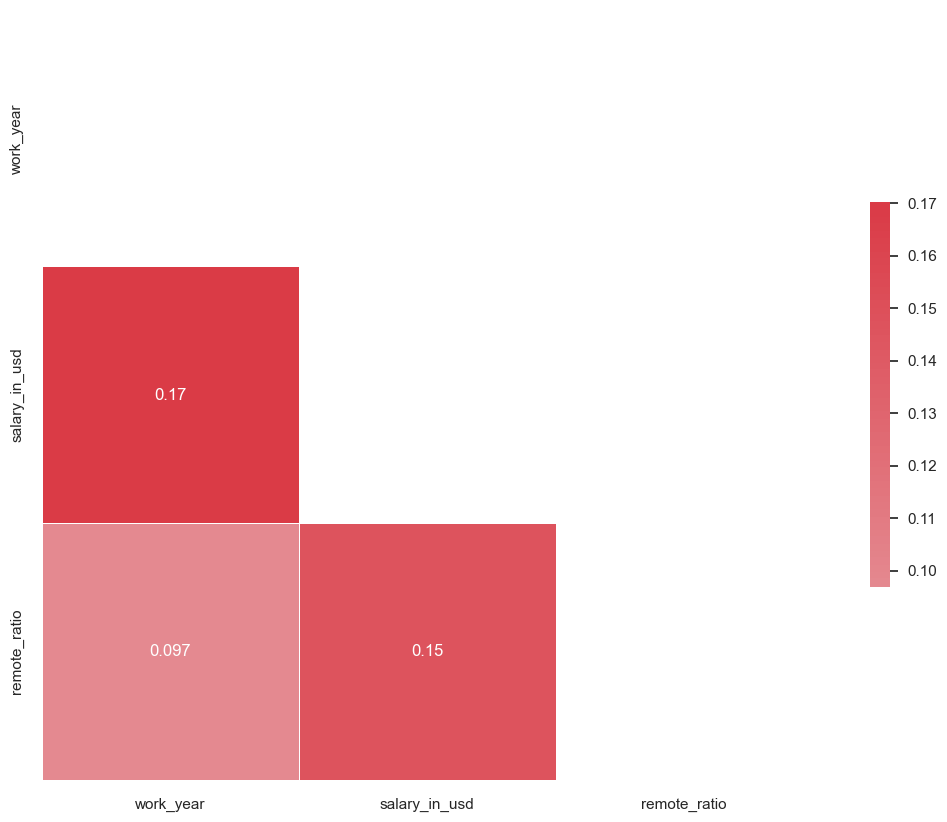

In [53]:
#cols salaries
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(salaries.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(salaries.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [54]:
train2 = salaries.copy(deep=True)

In [55]:
train2.drop(columns=salaries[['work_year','remote_ratio','company_location']], axis=1, inplace=True)

In [56]:
train2.columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_in_usd',
       'employee_residence', 'company_size'],
      dtype='object')

In [57]:
test2 = test.copy(deep=True)

In [58]:
test2.drop(columns=test2[['work_year','remote_ratio','company_location']], axis=1, inplace=True)

In [59]:
test2.columns

Index(['experience_level', 'employment_type', 'job_title',
       'employee_residence', 'company_size'],
      dtype='object')

In [60]:
#%pip install mlflow

In [62]:
!mlflow ui

"mlflow" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [65]:
from pycaret.regression import *
s= setup(train2, target = 'salary_in_usd')

,Description,Value
0,Session id,4126
1,Target,salary_in_usd
2,Target type,Regression
3,Original data shape,"(500, 6)"
4,Transformed data shape,"(500, 14)"
5,Transformed train set shape,"(350, 14)"
6,Transformed test set shape,"(150, 14)"
7,Categorical features,5
8,Preprocess,True
9,Imputation type,simple


In [66]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,37262.4128,3007334244.0617,52498.1602,0.3964,0.5711,0.6478,0.1060
gbr,Gradient Boosting Regressor,37377.5985,3022379044.1924,52607.5903,0.3957,0.5606,0.6192,0.1230
ridge,Ridge Regression,36829.9509,3019973282.2151,52827.2254,0.3884,0.5863,0.6819,0.0580
rf,Random Forest Regressor,37214.1640,3031870399.4250,52991.0470,0.3850,0.5460,0.6033,0.1850
xgboost,Extreme Gradient Boosting,38344.2385,3113546715.4876,53834.5576,0.3643,0.5583,0.6060,0.1230
et,Extra Trees Regressor,37961.2864,3109888996.3014,53843.6107,0.3585,0.5695,0.5807,0.2150
lasso,Lasso Regression,37188.6441,3163591724.7246,54085.8277,0.3510,0.6000,0.6799,0.0630
llar,Lasso Least Angle Regression,37188.5890,3163707490.6560,54086.8292,0.3509,0.5996,0.6801,0.0760
lr,Linear Regression,37190.4280,3164552863.9812,54092.4708,0.3508,0.6006,0.6798,0.0580
lar,Least Angle Regression,37190.4280,3164552863.9806,54092.4708,0.3508,0.6006,0.6798,0.0710


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [67]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [68]:
predictions = predict_model(best,data = test2)

In [69]:
predictions

,experience_level,employment_type,job_title,employee_residence,company_size,prediction_label
0,SE,FT,Machine Learning Scientist,JP,S,103770.095238
1,MI,FT,Lead Data Analyst,US,L,150973.133333
2,MI,FT,Data Analyst,US,L,150973.133333
3,MI,FT,Machine Learning Engineer,CN,M,52611.474453
4,MI,FT,Product Data Analyst,IN,L,54590.556962
...,...,...,...,...,...,...
102,SE,FT,Data Analyst,US,M,150973.133333
103,SE,FT,Data Architect,US,M,155553.034483
104,SE,FT,Data Scientist,US,M,155553.034483
105,EN,FT,Data Analyst,CA,M,52611.474453


In [71]:
solution2= predictions.prediction_label

In [73]:
solution2 = pd.DataFrame(predictions.prediction_label)
solution2.head()

,prediction_label
0,103770.095238
1,150973.133333
2,150973.133333
3,52611.474453
4,54590.556962


In [74]:
solution2.reset_index(drop=True, inplace=True)

In [76]:
solution2.head()

,prediction_label
0,103770.095238
1,150973.133333
2,150973.133333
3,52611.474453
4,54590.556962


In [85]:
solution2.rename(columns={"": "id", 'prediction_label': "salary_in_usd"}, inplace= True)

In [86]:
solution2

,salary_in_usd
0,103770.095238
1,150973.133333
2,150973.133333
3,52611.474453
4,54590.556962
...,...
102,150973.133333
103,155553.034483
104,155553.034483
105,52611.474453


In [87]:
solution2.to_csv('sols/sol2.csv')

PermissionError: [Errno 13] Permission denied: 'sols/sol2.csv'

In [84]:
from sklearn.metrics import mean_squared_error as mse
mse(train2, test2, squared=False)

ValueError: Found input variables with inconsistent numbers of samples: [500, 107]

### 